In [1]:
#!pip install opendatasets

In [2]:
#import opendatasets as od
#import os

In [43]:
#data_set='https://www.kaggle.com/datasets/higgstachyon/kannada-mnist'
#data_set

In [44]:
#od.download(data_set)

In [45]:
#data_dir=".\kannada-mnist"

In [46]:
#os.listdir(data_dir)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA, NMF, TruncatedSVD, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
%matplotlib inline
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns



In [34]:
import numpy as np

In [35]:
x_train=np.load(r"C:\Users\pooja\Desktop\guvi_projects\final_project\Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\X_kannada_MNIST_train.npz")['arr_0']
x_test=np.load(r"C:\Users\pooja\Desktop\guvi_projects\final_project\Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\X_kannada_MNIST_test.npz")['arr_0']
y_train=np.load(r"C:\Users\pooja\Desktop\guvi_projects\final_project\Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\y_kannada_MNIST_train.npz")['arr_0']
y_test=np.load(r"C:\Users\pooja\Desktop\guvi_projects\final_project\Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\y_kannada_MNIST_test.npz")['arr_0']

In [36]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [37]:
def plot_random_digit():
    random_index = np.random.randint(0,x_train.shape[0])
    plt.imshow(x_train[random_index], cmap='BuPu_r')
    plt.title(y_train[random_index])
    plt.axis("Off")

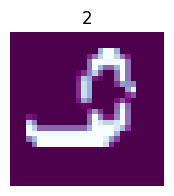

In [38]:
plt.figure(figsize=[2,2])
plot_random_digit()

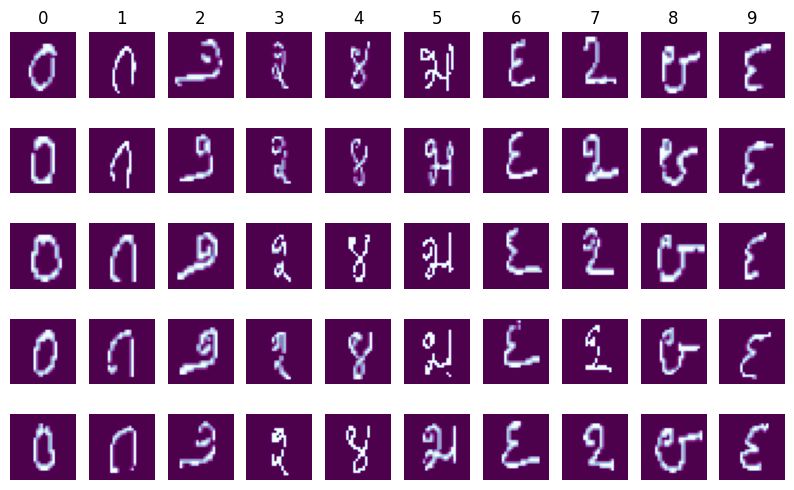

In [40]:
plt.figure(figsize=[10,6])
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(x_train[i], cmap='BuPu_r')

In [42]:
x_train_reshape = x_train.reshape(x_train.shape[0], 784)
x_test_reshape = x_test.reshape(x_test.shape[0], 784)
x_train_reshape.shape, x_test_reshape.shape

((60000, 784), (10000, 784))

### LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver="liblinear", multi_class="ovr")

# Fitting on first 10000 records for faster training  
lr1.fit(x_train_reshape[:10000], y_train[:10000])

LogisticRegression(multi_class='ovr', solver='liblinear')

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred = lr1.predict(x_train_reshape[:10000])

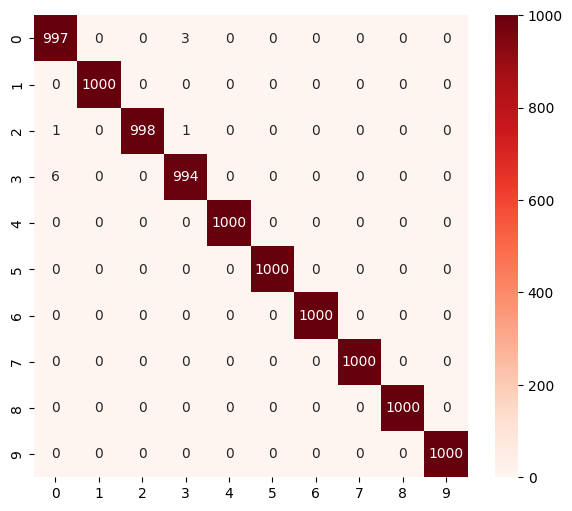

In [51]:
cm = confusion_matrix(y_train[:10000], y_train_pred[:10000])

plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [52]:
print("Accuracy: "+ str(accuracy_score(y_train[:10000], y_train_pred)))
print(classification_report(y_train[:10000], y_train_pred))

Accuracy: 0.9989
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      0.99      0.99      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### DecesionTreeClassifier

In [54]:
#modeling
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train_reshape[:10000],y_train[:10000])

DecisionTreeClassifier()

In [60]:
#prediction
ypred_test=model.predict(x_test_reshape)
ypred_train=model.predict(x_train_reshape[:10000])

In [61]:
#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred = model.predict(x_train_reshape[:10000])

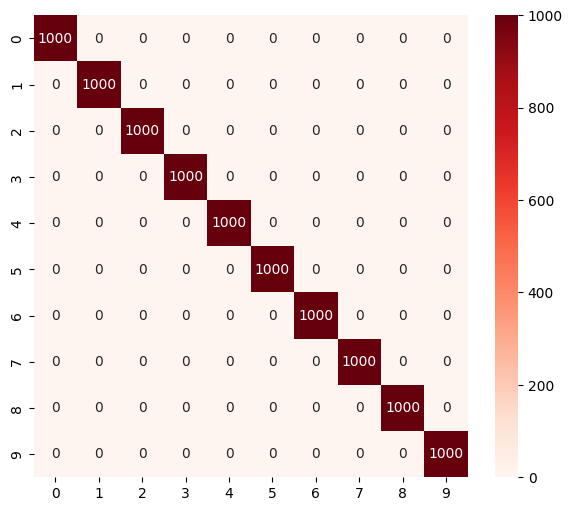

In [62]:
cm = confusion_matrix(y_train[:10000], y_train_pred[:10000])

plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [63]:
print("Accuracy: "+ str(accuracy_score(y_train[:10000], y_train_pred)))
print(classification_report(y_train[:10000], y_train_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Random Forest Classifier

In [64]:
#modeling
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier(n_estimators=100,max_depth=3,max_features="sqrt")
model1.fit(x_train_reshape[:10000],y_train[:10000]) #n_estimators=100 means combinding 100 dt

RandomForestClassifier(max_depth=3)

In [66]:
#prediction
y_pred_test=model1.predict(x_test_reshape)
y_pred_train=model1.predict(x_train_reshape[:10000])

In [67]:
#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred = model1.predict(x_train_reshape[:10000])

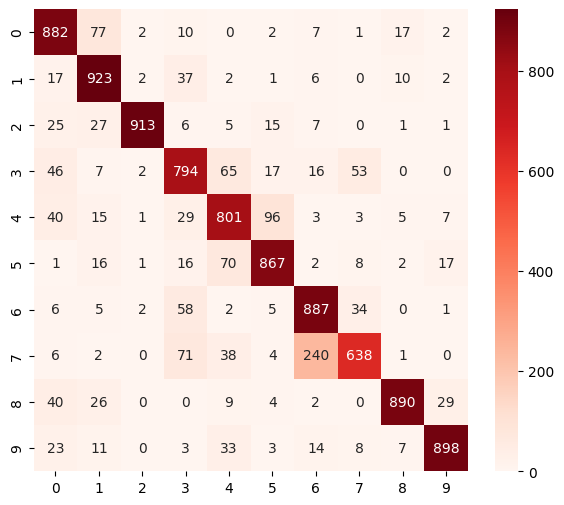

In [68]:
cm = confusion_matrix(y_train[:10000], y_train_pred[:10000])

plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [69]:
print("Accuracy: "+ str(accuracy_score(y_train[:10000], y_train_pred)))
print(classification_report(y_train[:10000], y_train_pred))

Accuracy: 0.8493
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1000
           1       0.83      0.92      0.88      1000
           2       0.99      0.91      0.95      1000
           3       0.78      0.79      0.78      1000
           4       0.78      0.80      0.79      1000
           5       0.86      0.87      0.86      1000
           6       0.75      0.89      0.81      1000
           7       0.86      0.64      0.73      1000
           8       0.95      0.89      0.92      1000
           9       0.94      0.90      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### KNN(k nearest neighbur)

In [70]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
model2.fit(x_train_reshape[:10000],y_train[:10000]) #n_estimators=100 means combinding 100 dt


KNeighborsClassifier()

In [71]:
#prediction
y_pred_test=model2.predict(x_test_reshape)
y_pred_train=model2.predict(x_train_reshape[:10000])

In [72]:
#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred = model2.predict(x_train_reshape[:10000])

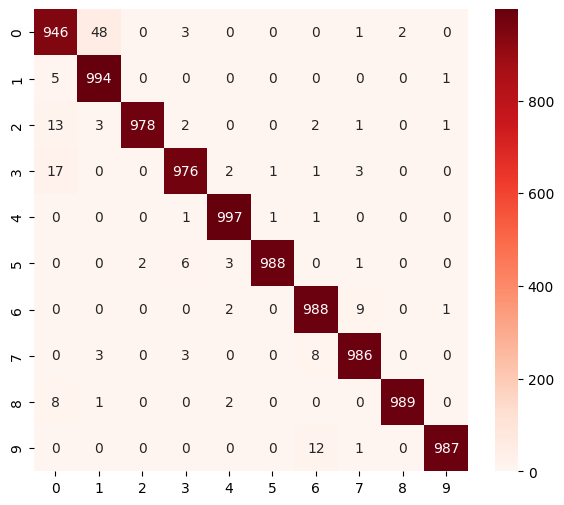

In [73]:
cm = confusion_matrix(y_train[:10000], y_train_pred[:10000])

plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [74]:
print("Accuracy: "+ str(accuracy_score(y_train[:10000], y_train_pred)))
print(classification_report(y_train[:10000], y_train_pred))

Accuracy: 0.9829
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1000
           1       0.95      0.99      0.97      1000
           2       1.00      0.98      0.99      1000
           3       0.98      0.98      0.98      1000
           4       0.99      1.00      0.99      1000
           5       1.00      0.99      0.99      1000
           6       0.98      0.99      0.98      1000
           7       0.98      0.99      0.99      1000
           8       1.00      0.99      0.99      1000
           9       1.00      0.99      0.99      1000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### SVM(SUPPORT VECTORE MACHINES)

In [76]:
#modelling
from sklearn.svm import SVC
model3= SVC()
model3.fit(x_train_reshape[:10000],y_train[:10000])

SVC()

In [77]:
#prediction
y_pred_test=model3.predict(x_test_reshape)
y_pred_train=model3.predict(x_train_reshape[:10000])

In [78]:
#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred = model3.predict(x_train_reshape[:10000])

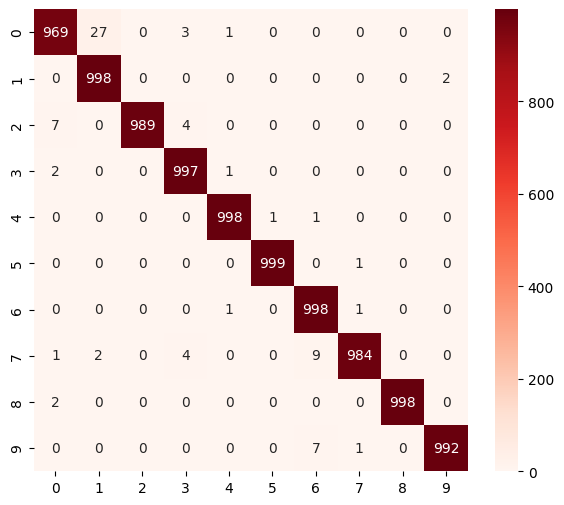

In [79]:
cm = confusion_matrix(y_train[:10000], y_train_pred[:10000])

plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [80]:
print("Accuracy: "+ str(accuracy_score(y_train[:10000], y_train_pred)))
print(classification_report(y_train[:10000], y_train_pred))

Accuracy: 0.9922
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      1.00      0.98      1000
           2       1.00      0.99      0.99      1000
           3       0.99      1.00      0.99      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       0.98      1.00      0.99      1000
           7       1.00      0.98      0.99      1000
           8       1.00      1.00      1.00      1000
           9       1.00      0.99      0.99      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###HYPERPARAMETER TUNING

In [82]:
'''from sklearn.model_selection import GridSearchCV
estimator=SVC()
param_grid={'C':[0.01,0.1,10,100],"kernel":["linear","rbf","sigmoid","poly"]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x,y)
grid.best_params_'''

'from sklearn.model_selection import GridSearchCV\nestimator=SVC()\nparam_grid={\'C\':[0.01,0.1,10,100],"kernel":["linear","rbf","sigmoid","poly"]}\ngrid=GridSearchCV(estimator,param_grid,cv=5)\ngrid.fit(x,y)\ngrid.best_params_'

####Rebuilding the SVM model with best parameters

In [83]:
'''model5=SVC(kernel="linear",c=1)
model5.fit(x_train,y_train)


y_pred_test=model4.predict(x_test)
y_pred_train=model4.predict(x_train)

#accuracy
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score
print("Train Acuuracy:",accuracy_score(y_train,ypred_train))
print("Test Acuuracy:",accuracy_score(y_test,ypred_test))
print("r2_score:",r2_score(y_test,ypred_test))
print("f1_score:",f1_score(y_test,ypred_test))
print("precision_score:",precision_score(y_test,ypred_test))
print("recall_score:",recall_score(y_test,ypred_test))'''

'model5=SVC(kernel="linear",c=1)\nmodel5.fit(x_train,y_train)\n\n\ny_pred_test=model4.predict(x_test)\ny_pred_train=model4.predict(x_train)\n\n#accuracy\nfrom sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,recall_score\nprint("Train Acuuracy:",accuracy_score(y_train,ypred_train))\nprint("Test Acuuracy:",accuracy_score(y_test,ypred_test))\nprint("r2_score:",r2_score(y_test,ypred_test))\nprint("f1_score:",f1_score(y_test,ypred_test))\nprint("precision_score:",precision_score(y_test,ypred_test))\nprint("recall_score:",recall_score(y_test,ypred_test))'